# Advanced Regression Assignment
## Problem Statement -Part 1

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:
- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.
 
 

Also, determine the optimal value of lambda for ridge and lasso regression.

# Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Data Understanding and Exploration
Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
#import the libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#read the file
df=pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [3]:
#Understand the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#Sum of null value
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null.head()

Null %
Features           
PoolQC        99.52
MiscFeature   96.30
Alley         93.77
Fence         80.75
MasVnrType    59.73

In [7]:
# dataframe with features having null values
null_df = null[null["Null %"] > 0]
null_df

Null %
Features            
PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
MasVnrType     59.73
FireplaceQu    47.26
LotFrontage    17.74
GarageYrBlt     5.55
GarageCond      5.55
GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
MasVnrArea      0.55
Electrical      0.07

In [8]:
# we will drop the 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu'column becuase there are so many missing values and id column is not required
df = df.drop(['PoolQC','MiscFeature','Id','Alley','Fence','FireplaceQu'],axis=1)

In [9]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

Null %
Features            
MasVnrType     59.73
LotFrontage    17.74
GarageCond      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageType      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrArea      0.55
Electrical      0.07

In [10]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
 

In [11]:
#Categorical columns
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [12]:
# Numeric columns
df.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

In [13]:
# lets observe the columns with highest percentage of missing values
print('The unique values in columns with highest number if nan or missing values')
print('\n')
print('LotFrontage: ',df['LotFrontage'].value_counts())
print('\n')
print('GarageCond: ',df['GarageCond'].value_counts())
print('\n')
print('GarageType: ',df['GarageType'].value_counts())
print('\n')
print('GarageYrBlt: ',df['GarageYrBlt'].value_counts())
print('\n')
print('GarageFinish: ',df['GarageFinish'].value_counts())
print('\n')
print('GarageQual: ',df['GarageQual'].value_counts())
print('\n')
print('BsmtExposure: ',df['BsmtExposure'].value_counts())
print('\n')
print('BsmtFinType2: ',df['BsmtFinType2'].value_counts())
print('\n')
print('BsmtFinType1: ',df['BsmtFinType1'].value_counts())
print('\n')
print('BsmtCond: ',df['BsmtCond'].value_counts())
print('\n')
print('BsmtQual: ',df['BsmtQual'].value_counts())
print('\n')
print('MasVnrArea: ',df['MasVnrArea'].value_counts())
print('\n')
print('MasVnrType: ',df['MasVnrType'].value_counts())
print('\n')
print('Electrical: ',df['Electrical'].value_counts())

The unique values in columns with highest number if nan or missing values


LotFrontage:  LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
4

In [15]:
# for the LotFrontage column and GarageYrBlt we will impute the missing values with the median since the feature contains outliers
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

# for the "below columns" we will impute the null values with 'mode'
for col in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual'):
    
    df[col] = df[col].fillna(df[col].mode()[0])
    
# for the "Bsmt" columns we will impute the null values with 'mode'
for col in ('BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual'):
    
    df[col] = df[col].fillna(df[col].mode()[0])
    
# for the columns we will impute the null values with 'mode'

for col in ('MasVnrArea', 'MasVnrType', 'Electrical'):
    
    df[col] = df[col].fillna(df[col].mode()[0])

    
#Features	

#GarageYrBlt	 N                            
#LotFrontag   --N

#GarageType	-- C
#GarageCond	 --C
#GarageQual	-- C
#GarageFinish -C
#BsmtExposure -c
#BsmtFinType2 -C
#BsmtFinType1 -C
#BsmtCond	   C
#BsmtQual	   C
#MasVnrArea	   C
#MasVnrType	   C
#Electrical	   C

In [17]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

Empty DataFrame
Columns: [Null %]
Index: []

In [18]:
# checking for the presence of any more null values
df.isnull().values.any()

False

In [19]:
# check Null value
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [20]:
# Check the shape
df.shape

(1460, 75)

In [21]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean     56.897260    69.863699   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.117123   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.589041     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std      42.300571    22.027677    9981.264932     1.382997     1.112799    30.202904     20.645407   180.731373   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    23.997022     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min      20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%      20.000000    60.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1962.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%      50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%      70.000000    79.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   164.250000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2001.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000     0.000000     0.000000      0.000000     8.000000  2009.000000  214000.000000


In [22]:
print(df['PoolArea'].value_counts())
print(df['MiscVal'].value_counts())
print(df['3SsnPorch'].value_counts())

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64
MiscVal
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: count, dtype: int64
3SsnPorch
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: count, dtype: int64


In [23]:
# we will drop these columns as it dominated by one value and it won't add any extra information to our model
df = df.drop(['PoolArea','MiscVal','3SsnPorch'],axis=1)

In [24]:
df.shape

(1460, 72)

In [25]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000    1460.000000
mean     56.897260    69.863699   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.117123   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.589041     1.767123   472.980137    94.244521    46.660274      21.954110    15.060959     6.321918  2007.815753  180921.195890
std      42.300571    22.027677    9981.264932     1.382997     1.112799    30.202904     20.645407   180.731373   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    23.997022     0.747315   213.804841   125.338794    66.256028      61.119149    55.757415     2.703626     1.328095   79442.502883
min      20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     1.000000  2006.000000   34900.000000
25%      20.000000    60.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1962.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     5.000000  2007.000000  129975.000000
50%      50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     6.000000  2008.000000  163000.000000
75%      70.000000    79.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   164.250000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2001.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000     8.000000  2009.000000  214000.000000
max     190.000000   313.000000  215245.000000    10.000000     9.000000  2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  6110.000000  4692.000000  2065.000000    572.000000  5642.000000      3.000000      2.000000     3.000000     2.000000      8.000000      3.000000     14.000000     3.

# EDA, Visualization & Outliers Treatment 

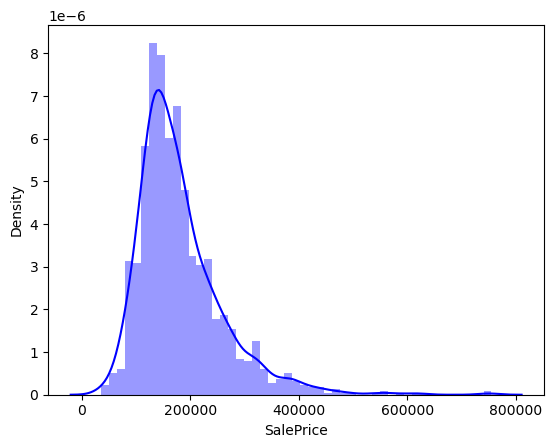

In [69]:
# Sale columns
plt.figure()
sns.distplot(df['SalePrice'],color='b')
plt.show()

In [25]:
# Numeric columns
df.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

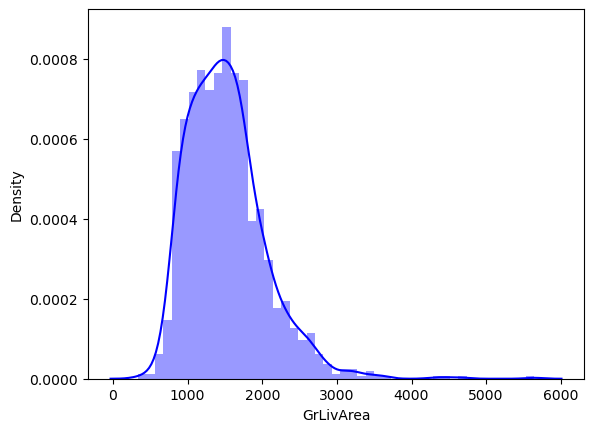

In [26]:
# Sale columns
plt.figure()
sns.distplot(df['GrLivArea'],color='b')
plt.show()

In [70]:
# IQR to remove the outlier
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] # one or more

Q1 = df[cols].quantile(0.05)
Q3 = df[cols].quantile(0.95)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

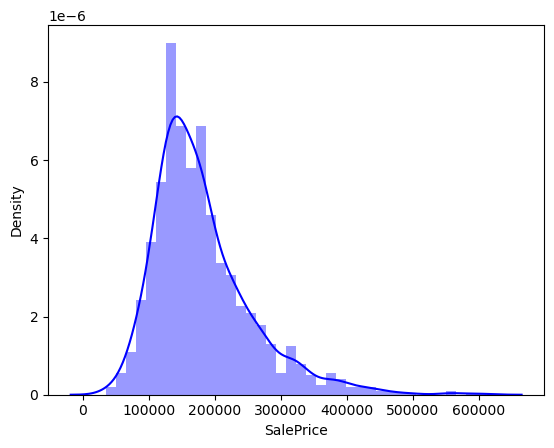

In [28]:
# Sale columns
plt.figure()
sns.distplot(df['SalePrice'],color='b')
plt.show()

In [26]:
df.info()
# Now we have remove some outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

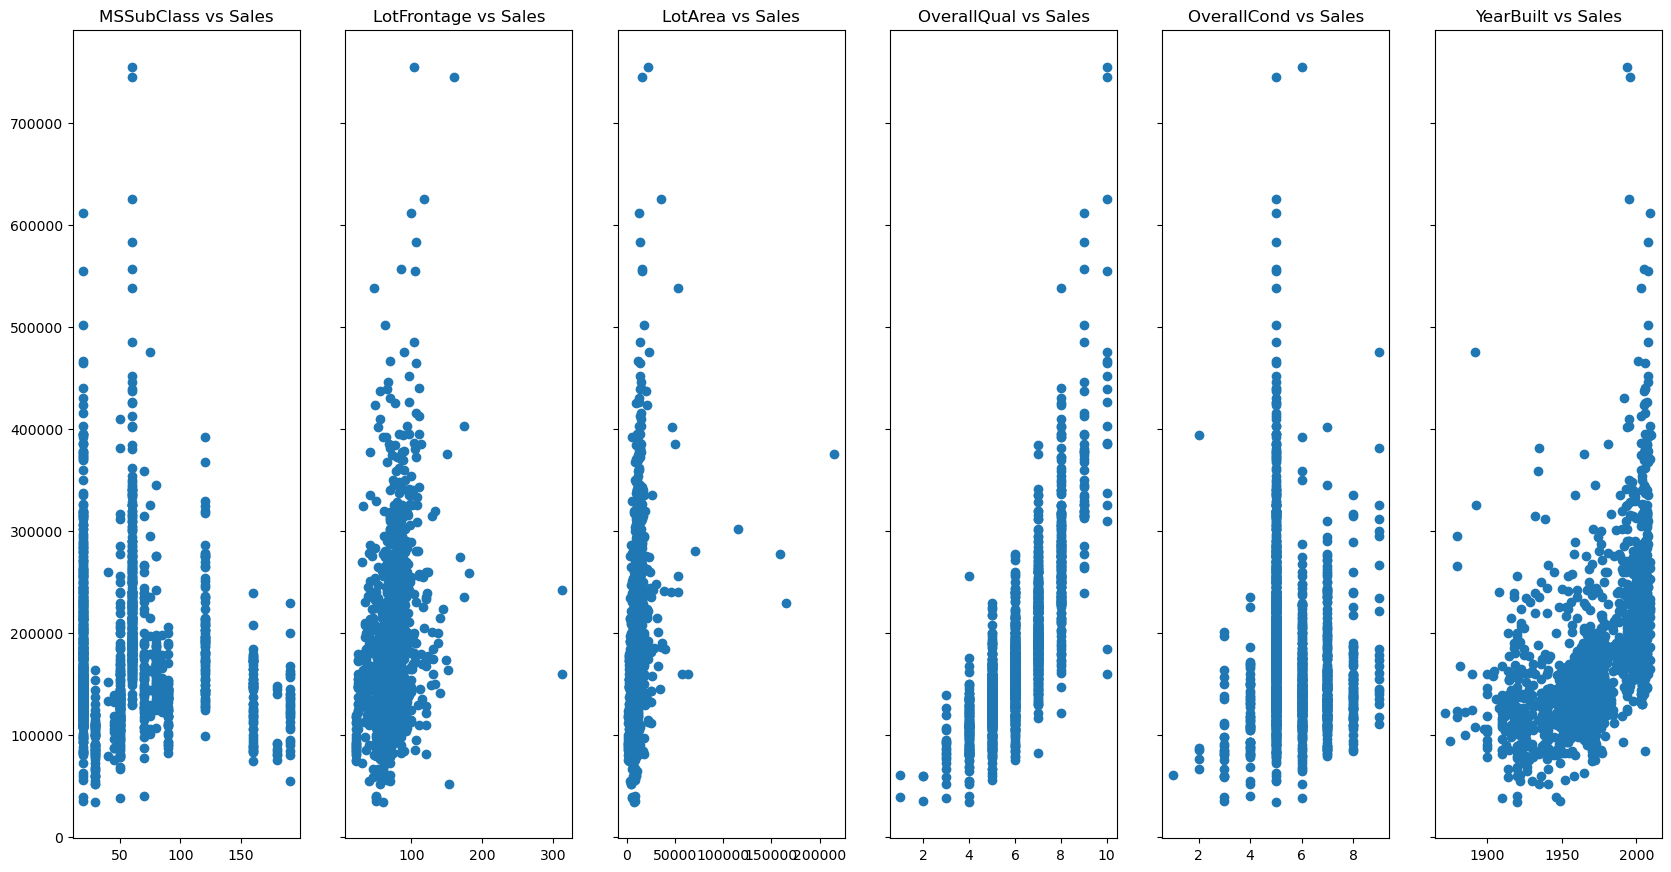

In [27]:
fig, ax = plt.subplots(ncols=6, sharey=True)

MSSubClass = ax[0].scatter(df['MSSubClass'], df['SalePrice'])
MSSubClass.set_label("MSSubClass")
ax[0].set_title('MSSubClass vs Sales')

LotFrontage= ax[1].scatter(df['LotFrontage'], df['SalePrice'])
LotFrontage.set_label("LotFrontage")
ax[1].set_title('LotFrontage vs Sales')

LotArea = ax[2].scatter(df['LotArea'], df['SalePrice'])
LotArea.set_label("LotArea")
ax[2].set_title('LotArea vs Sales')

OverallQual = ax[3].scatter(df['OverallQual'], df['SalePrice'])
OverallQual.set_label("LotArea")
ax[3].set_title('OverallQual vs Sales')

OverallCond = ax[4].scatter(df['OverallCond'], df['SalePrice'])
OverallCond.set_label("OverallCond")
ax[4].set_title('OverallCond vs Sales')

YearBuilt = ax[5].scatter(df['YearBuilt'], df['SalePrice'])
YearBuilt.set_label("YearBuilt")
ax[5].set_title('YearBuilt vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()
#['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
#'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
#'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
#'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']

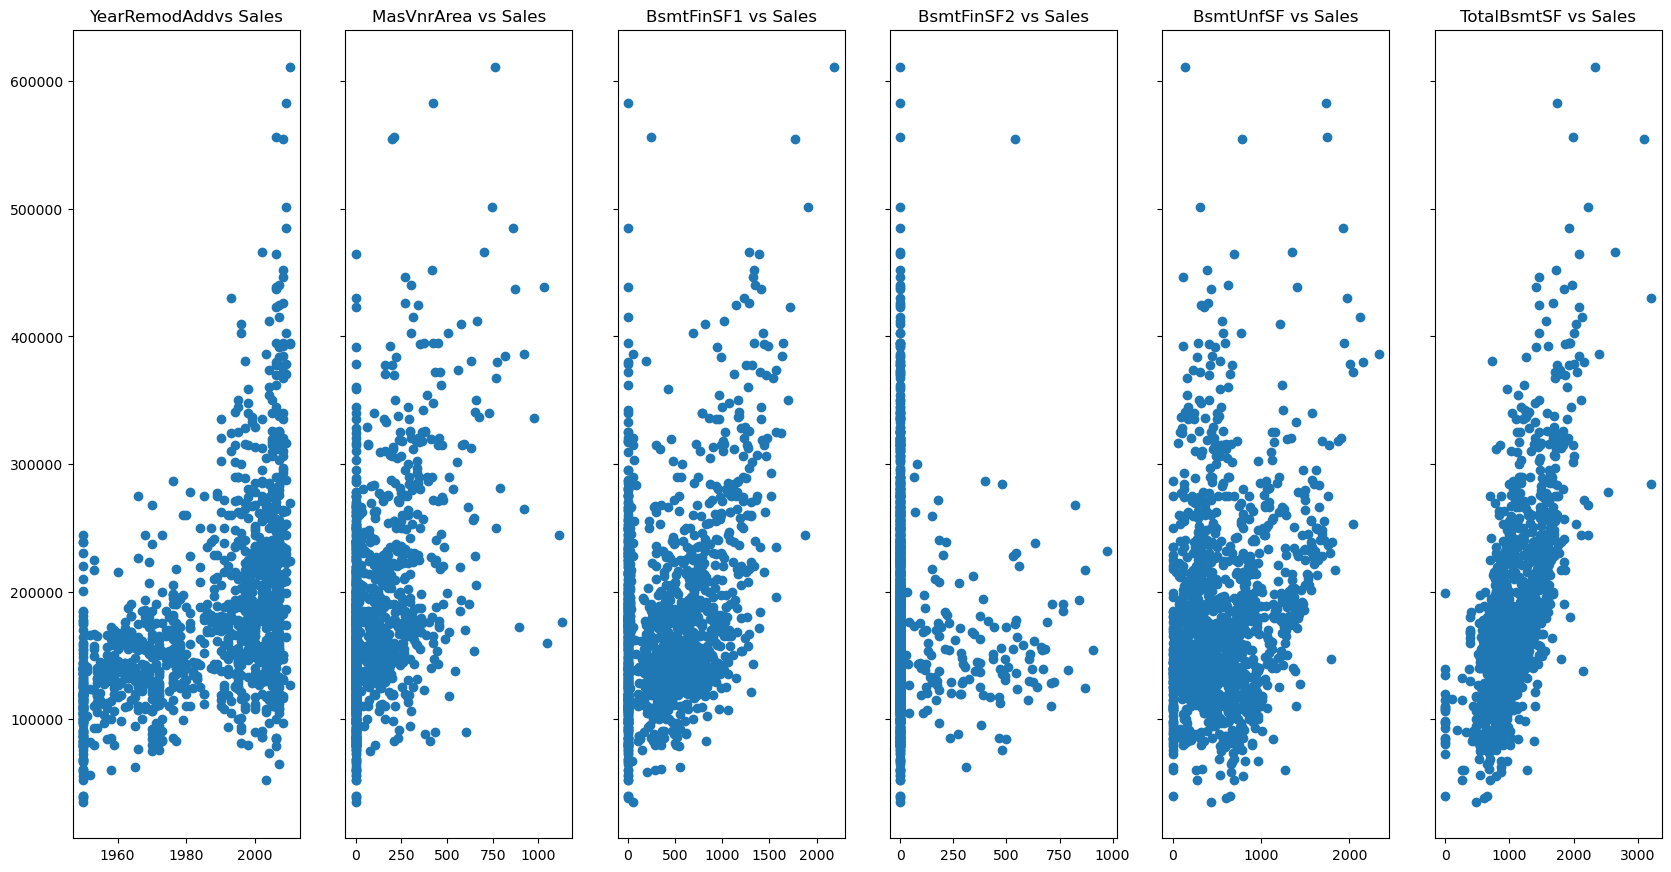

In [32]:
fig, ax = plt.subplots(ncols=6, sharey=True)

YearRemodAdd = ax[0].scatter(df['YearRemodAdd'], df['SalePrice'])
YearRemodAdd.set_label("YearRemodAdd")
ax[0].set_title('YearRemodAddvs Sales')

MasVnrArea= ax[1].scatter(df['MasVnrArea'], df['SalePrice'])
MasVnrArea.set_label("MasVnrArea")
ax[1].set_title('MasVnrArea vs Sales')

BsmtFinSF1 = ax[2].scatter(df['BsmtFinSF1'], df['SalePrice'])
BsmtFinSF1.set_label("BsmtFinSF1")
ax[2].set_title('BsmtFinSF1 vs Sales')

BsmtFinSF2 = ax[3].scatter(df['BsmtFinSF2'], df['SalePrice'])
BsmtFinSF2.set_label("BsmtFinSF2")
ax[3].set_title('BsmtFinSF2 vs Sales')

BsmtUnfSF = ax[4].scatter(df['BsmtUnfSF'], df['SalePrice'])
BsmtUnfSF.set_label("BsmtUnfSF")
ax[4].set_title('BsmtUnfSF vs Sales')

TotalBsmtSF = ax[5].scatter(df['TotalBsmtSF'], df['SalePrice'])
TotalBsmtSF.set_label("TotalBsmtSF")
ax[5].set_title('TotalBsmtSF vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()
#['YearRemodAdd', 'MasVnrArea', 
#'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
#'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
#'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']

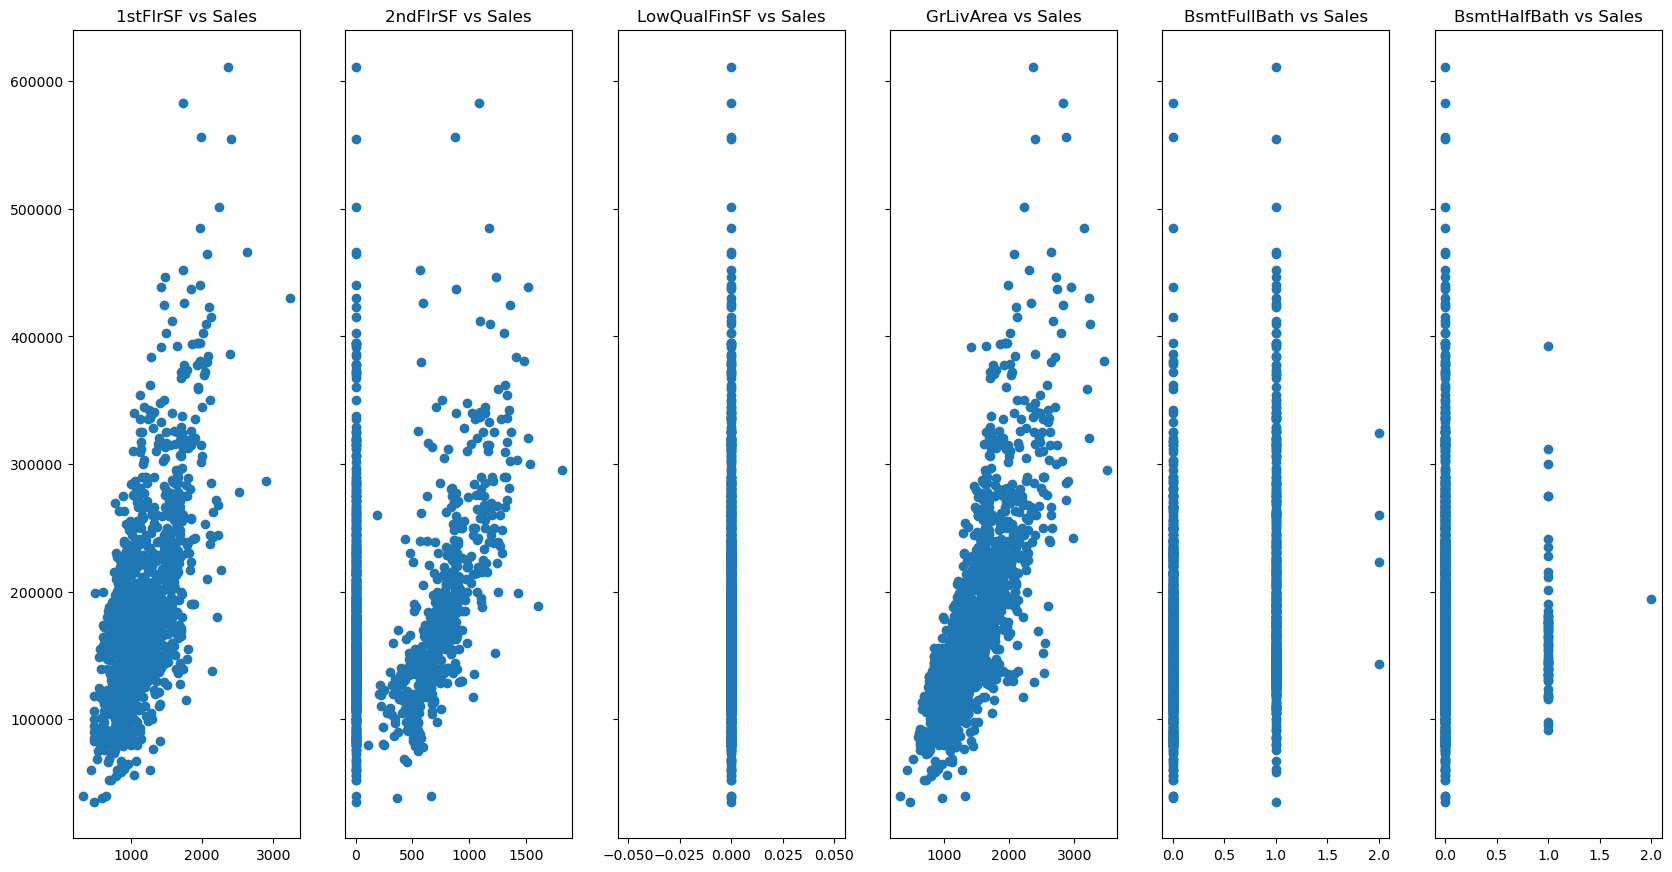

In [33]:
#['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
#'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
#'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']
fig, ax = plt.subplots(ncols=6, sharey=True)

stFlrSF = ax[0].scatter(df['1stFlrSF'], df['SalePrice'])
stFlrSF.set_label("1stFlrSF")
ax[0].set_title('1stFlrSF vs Sales')

ndFlrSF= ax[1].scatter(df['2ndFlrSF'], df['SalePrice'])
ndFlrSF.set_label("2ndFlrSF")
ax[1].set_title('2ndFlrSF vs Sales')

LowQualFinSF = ax[2].scatter(df['LowQualFinSF'], df['SalePrice'])
LowQualFinSF.set_label("LowQualFinSF")
ax[2].set_title('LowQualFinSF vs Sales')

GrLivArea = ax[3].scatter(df['GrLivArea'], df['SalePrice'])
GrLivArea.set_label("GrLivArea")
ax[3].set_title('GrLivArea vs Sales')

BsmtFullBath = ax[4].scatter(df['BsmtFullBath'], df['SalePrice'])
BsmtFullBath.set_label("BsmtFullBath")
ax[4].set_title('BsmtFullBath vs Sales')

BsmtHalfBath = ax[5].scatter(df['BsmtHalfBath'], df['SalePrice'])
BsmtHalfBath.set_label("BsmtHalfBath")
ax[5].set_title('BsmtHalfBath vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

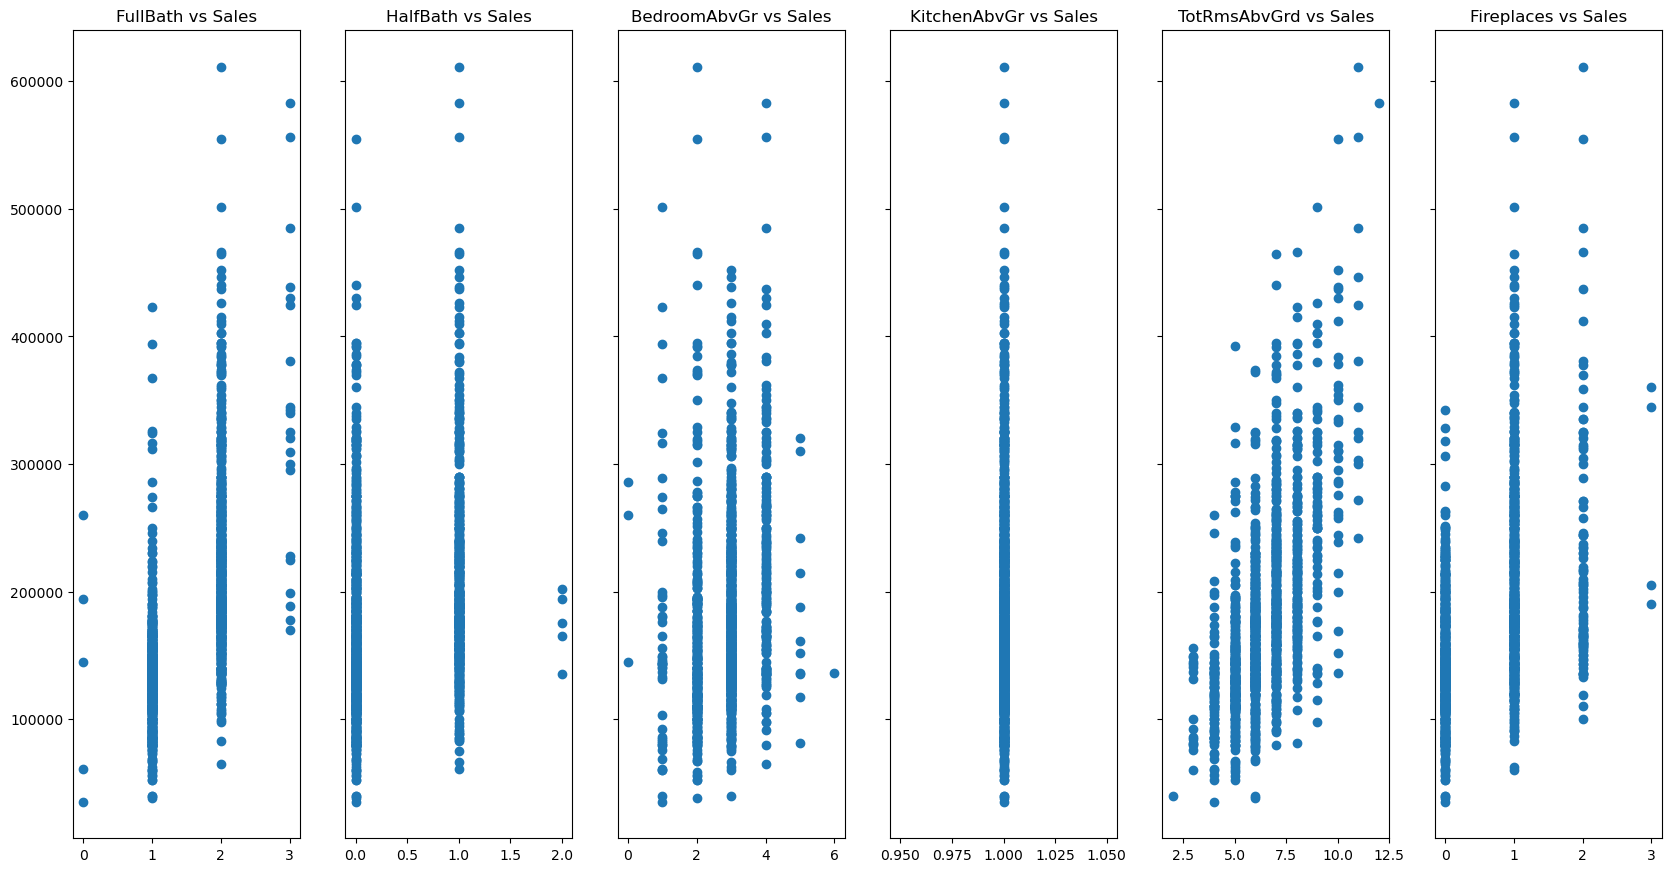

In [34]:
#['FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
#'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']
fig, ax = plt.subplots(ncols=6, sharey=True)

FullBath = ax[0].scatter(df['FullBath'], df['SalePrice'])
FullBath.set_label("FullBath")
ax[0].set_title('FullBath vs Sales')

HalfBath= ax[1].scatter(df['HalfBath'], df['SalePrice'])
HalfBath.set_label("HalfBath")
ax[1].set_title('HalfBath vs Sales')

BedroomAbvGr = ax[2].scatter(df['BedroomAbvGr'], df['SalePrice'])
BedroomAbvGr.set_label("BedroomAbvGr")
ax[2].set_title('BedroomAbvGr vs Sales')

KitchenAbvGr = ax[3].scatter(df['KitchenAbvGr'], df['SalePrice'])
KitchenAbvGr.set_label("KitchenAbvGr")
ax[3].set_title('KitchenAbvGr vs Sales')

TotRmsAbvGrd = ax[4].scatter(df['TotRmsAbvGrd'], df['SalePrice'])
TotRmsAbvGrd.set_label("TotRmsAbvGrd")
ax[4].set_title('TotRmsAbvGrd vs Sales')

Fireplaces = ax[5].scatter(df['Fireplaces'], df['SalePrice'])
Fireplaces.set_label("Fireplaces")
ax[5].set_title('Fireplaces vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

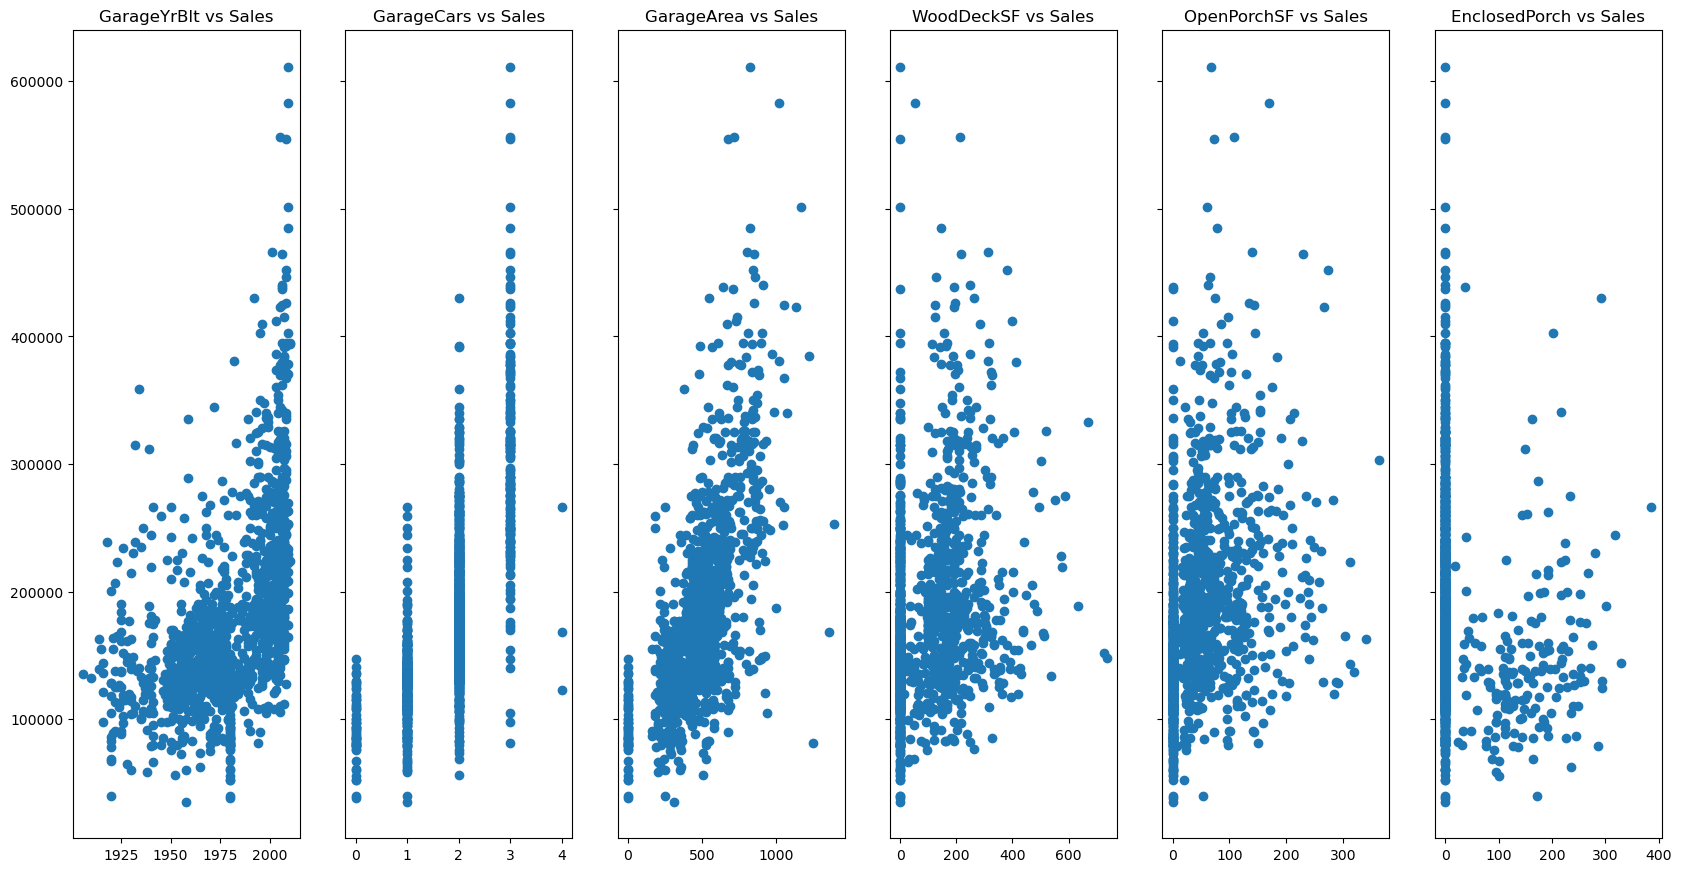

In [35]:
#[GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']
fig, ax = plt.subplots(ncols=6, sharey=True)

GarageYrBlt = ax[0].scatter(df['GarageYrBlt'], df['SalePrice'])
GarageYrBlt.set_label("GarageYrBlt")
ax[0].set_title('GarageYrBlt vs Sales')

GarageCars= ax[1].scatter(df['GarageCars'], df['SalePrice'])
GarageCars.set_label("GarageCars")
ax[1].set_title('GarageCars vs Sales')

GarageArea = ax[2].scatter(df['GarageArea'], df['SalePrice'])
GarageArea.set_label("GarageArea")
ax[2].set_title('GarageArea vs Sales')

WoodDeckSF = ax[3].scatter(df['WoodDeckSF'], df['SalePrice'])
WoodDeckSF.set_label("WoodDeckSF")
ax[3].set_title('WoodDeckSF vs Sales')

OpenPorchSF = ax[4].scatter(df['OpenPorchSF'], df['SalePrice'])
OpenPorchSF.set_label("OpenPorchSF")
ax[4].set_title('OpenPorchSF vs Sales')

EnclosedPorch = ax[5].scatter(df['EnclosedPorch'], df['SalePrice'])
EnclosedPorch.set_label("EnclosedPorch")
ax[5].set_title('EnclosedPorch vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

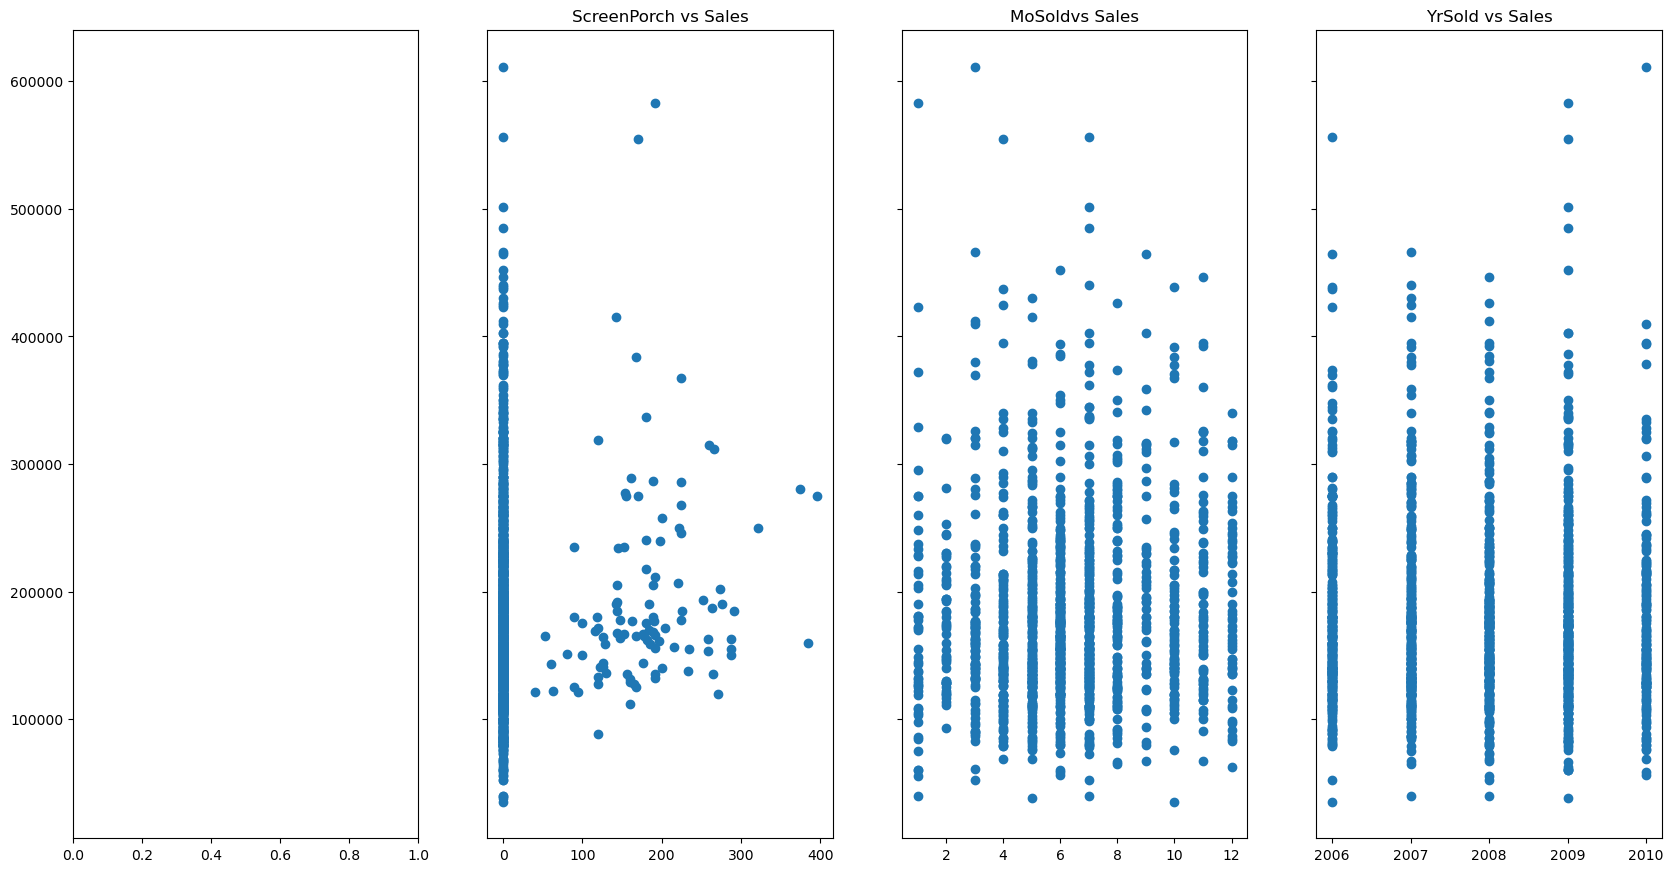

In [36]:
#['ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']
fig, ax = plt.subplots(ncols=4, sharey=True)


ScreenPorch= ax[1].scatter(df['ScreenPorch'], df['SalePrice'])
ScreenPorch.set_label("ScreenPorch")
ax[1].set_title('ScreenPorch vs Sales')

MoSold = ax[2].scatter(df['MoSold'], df['SalePrice'])
MoSold.set_label("MoSold")
ax[2].set_title('MoSoldvs Sales')

YrSold = ax[3].scatter(df['YrSold'], df['SalePrice'])
YrSold.set_label("YrSold")
ax[3].set_title('YrSold vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

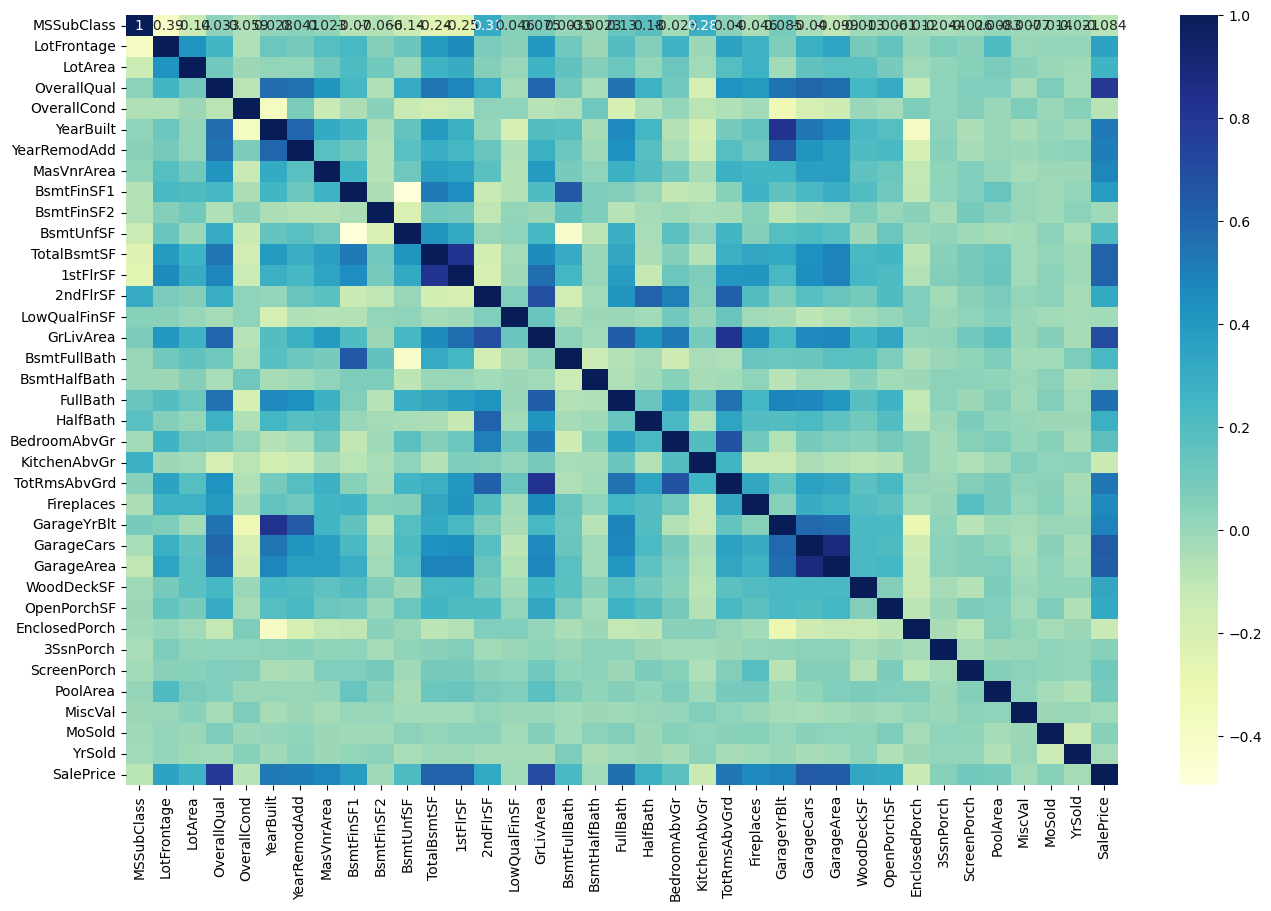

In [95]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap="YlGnBu")
plt.show()

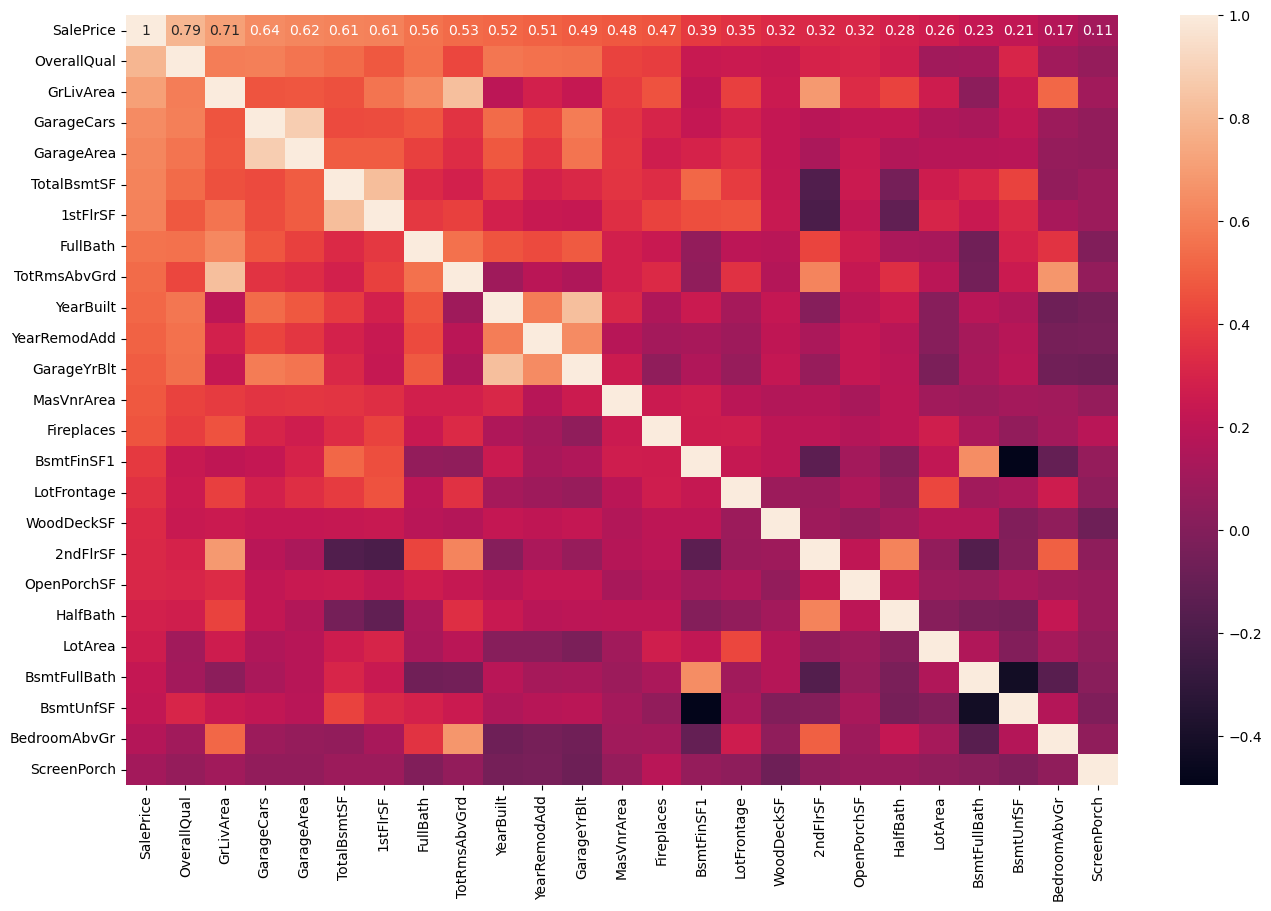

In [97]:
# sales price correlation matrix
plt.figure(figsize = (16, 10))
n = 25 # number of variables which have the highest correlation with 'Sales price'

corrmat = df.corr(numeric_only=True)

cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
#plt.figure(dpi=100)
sns.heatmap(df[cols].corr(numeric_only=True),annot=True)
plt.show()
# OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF are highly correlated to Saleprice

# Assigning Dummy Variables

In [28]:
#Categorical columns
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [29]:
# Convert categorical value into Dummy variable
df=pd.get_dummies(df,drop_first=True)
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0          60         65.0     8450            7            5       2003          2003       196.0         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0       2003.0           2         548           0           61              0            0       2    2008     208500        False        False         True        False         True         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                  True                 False                 False                 False                False                 False                 False               False                 False                False   
1          20         80.0     9600            6            8       1976          1976         0.0         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6           1       1976.0           2         460         298            0              0            0       5    2007     181500        False        False         True        False         True         False         False          True            False            False             True             False              False           True          False             False          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                 False               False                 False                False   
2          60         68.0    11250            7            5       2001          2002       162.0         486           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1       2001.0           2         608           0           42              0            0       9    2008     223500        False        False         True        False         True         False         False         False            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                  True                 False                 False                 False                False                 False                 False               False                 False                False   
3          70         60.0     9550        

# Splitting the data into train and test sets

In [30]:
#Split the data into train and test
y = df.pop('SalePrice')
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [31]:
X = df
X.shape

(1460, 228)

In [32]:
#import train_test_split to split the data
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
615           85         80.0     8800            6            7       1963          1963       156.0         763           0        173          936      1054         0             0       1054             1             0         1         0             3             1             6           0       1963.0           2         480         120            0              0            0       5    2010        False        False         True        False         True         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                 False                True                 False                False   
613           20         70.0     8402            5            5       2007          2007         0.0         206           0        914         1120      1120         0             0       1120             0             0         1         0             3             1             6           0       1980.0           0           0           0           30              0            0      12    2007        False        False         True        False         True         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                  True               False                 False                False   
1303          20         73.0     8688            7            5       2005          2005       228.0           0           0       1616         1616      1616         0             0       1616             0             0         2         0             3             1             7           0       2005.0           3         834         208           59              0            0       4    2006        False        False         True        False         True         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                 False               False                 False                False   
486           20         79.0    10289            5            7       1965   

In [35]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (978, 228)
X_test shape (482, 228)
y_train shape (978,)
y_test shape (482,)


# Scaling of numeric varaibles

In [36]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
615           85         80.0     8800            6            7       1963          1963       156.0         763           0        173          936      1054         0             0       1054             1             0         1         0             3             1             6           0       1963.0           2         480         120            0              0            0       5    2010        False        False         True        False         True         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                 False                True                 False                False   
613           20         70.0     8402            5            5       2007          2007         0.0         206           0        914         1120      1120         0             0       1120             0             0         1         0             3             1             6           0       1980.0           0           0           0           30              0            0      12    2007        False        False         True        False         True         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                  True               False                 False                False   
1303          20         73.0     8688            7            5       2005          2005       228.0           0           0       1616         1616      1616         0             0       1616             0             0         2         0             3             1             7           0       2005.0           3         834         208           59              0            0       4    2006        False        False         True        False         True         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                 False               False                 False                False   
486           20         79.0    10289            5            7       1965   

In [37]:
y_train.head()

615     137500
613     147000
1303    232000
486     156000
561     170000
Name: SalePrice, dtype: int64

In [38]:
X_test.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
892           20         70.0     8414            6            8       1963          2003         0.0         663           0        396         1059      1068         0             0       1068             0             1         1         0             3             1             6           0       1963.0           1         264         192            0              0            0       2    2006        False        False         True        False         True         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                 False               False                 False                False   
1105          60         98.0    12256            8            5       1994          1995       362.0        1032           0        431         1463      1500      1122             0       2622             1             0         2         1             3             1             9           2       1994.0           2         712         186           32              0            0       4    2010        False        False         True        False         True         False         False         False            False            False             True             False              False          False          False             False          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                 False               False                 False                False   
413           30         56.0     8960            5            6       1927          1950         0.0           0           0       1008         1008      1028         0             0       1028             0             0         1         0             2             1             5           1       1927.0           2         360           0            0            130            0       3    2010        False        False        False         True         True         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                 False               False                 False                False   
522           50         50.0     5000            6            7       1947   

In [39]:
y_test.head()

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

In [40]:
# columns to be scaled
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold'], dtype='object')

In [41]:
#num_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
  #     'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
  #     'GrLivArea', 'BedroomAbvGr', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
  #     'EnclosedPorch', 'ScreenPorch']


num_vars= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
           'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
           '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
           'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold']
X_train[num_vars].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold
615           85         80.0     8800            6            7       1963          1963       156.0         763           0        173          936      1054         0             0       1054             1             0         1         0             3             1             6           0       1963.0           2         480         120            0              0            0       5    2010
613           20         70.0     8402            5            5       2007          2007         0.0         206           0        914         1120      1120         0             0       1120             0             0         1         0             3             1             6           0       1980.0           0           0           0           30              0            0      12    2007
1303          20         73.0     8688            7            5       2005          2005       228.0           0           0       1616         1616      1616         0             0       1616             0             0         2         0             3             1             7           0       2005.0           3         834         208           59              0            0       4    2006
486           20         79.0    10289            5            7       1965          1965       168.0         836           0        237         1073      1073         0             0       1073             1             0         1         1             3             1             6           0       1965.0           2         515           0            0              0            0       6    2007
561           20         77.0    10010            5            5       1974          1975         0.0        1071         123        195         1389      1389         0             0       1389             1             0         1         0             2             1             6           1       1975.0           2         418         240           38              0            0       4    2006

In [42]:
X_train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch      MoSold       YrSold
count  978.000000   978.000000     978.000000   978.000000   978.000000   978.000000    978.000000   978.000000   978.000000   978.000000   978.000000   978.000000   978.000000   978.000000    978.000000   978.000000    978.000000    978.000000  978.000000  978.000000    978.000000    978.000000    978.000000  978.000000   978.000000  978.000000   978.000000  978.000000   978.000000     978.000000   978.000000  978.000000   978.000000
mean    57.223926    70.043967   10743.494888     6.119632     5.567485  1971.007157   1984.848671   107.169734   448.719836    41.670757   568.861963  1059.252556  1167.864008   352.068507      5.619632  1525.552147      0.423313      0.061350    1.582822    0.374233      2.882413      1.046012      6.534765    0.612474  1978.774029    1.785276   477.200409   97.285276    49.847648      21.476483    15.686094    6.377301  2007.804703
std     42.873836    23.023132   11556.193985     1.370475     1.113813    30.752902     20.760308   174.931681   459.981913   151.758104   444.189087   447.693528   389.356587   438.998906     47.376716   523.397313      0.520558      0.244319    0.544622    0.494629      0.811558      0.214446      1.618508    0.651058    24.266962    0.732984   210.092714  131.508239    69.714613      62.120825    56.826251    2.666325     1.328261
min     20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000    0.000000    0.000000      0.000000      0.000000      2.000000    0.000000  1900.000000    0.000000     0.000000    0.000000     0.000000       0.000000     0.000000    1.000000  2006.000000
25%     20.000000    60.000000    7544.500000     5.000000     5.000000  1953.000000   1966.000000     0.000000     0.000000     0.000000   223.000000   794.000000   888.000000     0.000000      0.000000  1144.250000      0.000000      0.000000    1.000000    0.000000      2.000000      1.000000      5.000000    0.000000  1962.000000    1.000000   352.000000    0.000000     0.000000       0.000000     0.000000    5.000000  2007.000000
50%     50.000000    69.000000    9579.500000     6.000000     5.000000  1972.000000   1994.000000     0.000000   395.500000     0.000000   480.500000   994.000000  1096.500000     0.000000      0.000000  1472.000000      0.000000      0.000000    2.000000    0.000000      3.000000      1.000000      6.000000    1.000000  1980.000000    2.000000   484.000000    0.000000    27.000000       0.000000     0.000000    6.000000  2008.000000
75%     70.000000    79.000000   11616.000000     7.000000     6.000000  2001.000000   2004.000000   170.750000   727.000000     0.000000   807.500000  1296.750000  1392.000000   728.000000      0.000000  1787.750000      1.000000      0.000000    2.000000    1.000000      3.000000      1.000000      7.000000    1.000000  2001.000000    2.000000   576.000000  170.500000    73.750000       0.000000     0.000000    8.000000  2009.000000
max    190.000000   313.000000  215245.000000    10.000000     9.000000  2010.000000   2010.000000  1378.000000  5644.000000  1127.000000  2336.000000  6110.000000  4692.000000  1818.000000    572.000000  5642.000000      3.000000      2.000000    3.000000    2.000000      8.000000      2.000000     14.000000    3.000000  2010.000000    4.000000  1418.000000  857.000000   547.000000     552.000000   480.000000   12.000000  2010.000000

In [43]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
615           85         80.0     8800            6            7       1963          1963       156.0         763           0        173          936      1054         0             0       1054             1             0         1         0             3             1             6           0       1963.0           2         480         120            0              0            0       5    2010        False        False         True        False         True         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                 False                True                 False                False   
613           20         70.0     8402            5            5       2007          2007         0.0         206           0        914         1120      1120         0             0       1120             0             0         1         0             3             1             6           0       1980.0           0           0           0           30              0            0      12    2007        False        False         True        False         True         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                  True               False                 False                False   
1303          20         73.0     8688            7            5       2005          2005       228.0           0           0       1616         1616      1616         0             0       1616             0             0         2         0             3             1             7           0       2005.0           3         834         208           59              0            0       4    2006        False        False         True        False         True         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                 False               False                 False                False   
486           20         79.0    10289            5            7       1965   

In [44]:
#Scaling using MinMax
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#scaler = StandardScaler()
scaler=MinMaxScaler()

In [45]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [46]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
615     0.382353     0.202055  0.035056     0.555556         0.75   0.659420      0.216667    0.113208    0.135188    0.000000   0.074058     0.153191  0.165213       0.0           0.0   0.135644      0.333333           0.0  0.333333       0.0         0.375           0.5      0.333333    0.000000     0.572727        0.50    0.338505    0.140023     0.000000            0.0          0.0  0.363636    1.00        False        False         True        False         True         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                 False                True                 False                False   
613     0.000000     0.167808  0.033195     0.444444         0.50   0.978261      0.950000    0.000000    0.036499    0.000000   0.391267     0.183306  0.180358       0.0           0.0   0.148078      0.000000           0.0  0.333333       0.0         0.375           0.5      0.333333    0.000000     0.727273        0.00    0.000000    0.000000     0.054845            0.0          0.0  1.000000    0.25        False        False         True        False         True         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                  True               False                 False                False   
1303    0.000000     0.178082  0.034532     0.666667         0.50   0.963768      0.916667    0.165457    0.000000    0.000000   0.691781     0.264484  0.294172       0.0           0.0   0.241522      0.000000           0.0  0.666667       0.0         0.375           0.5      0.416667    0.000000     0.954545        0.75    0.588152    0.242707     0.107861            0.0          0.0  0.272727    0.00        False        False         True        False         True         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                 False               False                 False                False   
486     0.000000     0.198630  0.042015     0.444444         0.75 

In [47]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
892     0.000000     0.167808  0.033252     0.555556        0.875   0.659420      0.883333    0.000000    0.117470         0.0   0.169521     0.173322  0.168426  0.000000           0.0   0.138282      0.000000           0.5  0.333333       0.0         0.375           0.5      0.333333    0.000000     0.572727        0.25    0.186178    0.224037     0.000000       0.000000          0.0  0.090909    0.00        False        False         True        False         True         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                 False               False                 False                False   
1105    0.235294     0.263699  0.051209     0.777778        0.500   0.884058      0.750000    0.262700    0.182849         0.0   0.184503     0.239444  0.267554  0.617162           0.0   0.431047      0.333333           0.0  0.666667       0.5         0.375           0.5      0.583333    0.666667     0.854545        0.50    0.502116    0.217036     0.058501       0.000000          0.0  0.272727    1.00        False        False         True        False         True         False         False         False            False            False             True             False              False          False          False             False          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                 False               False                 False                False   
413     0.058824     0.119863  0.035804     0.444444        0.625   0.398551      0.000000    0.000000    0.000000         0.0   0.431507     0.164975  0.159247  0.000000           0.0   0.130746      0.000000           0.0  0.333333       0.0         0.250           0.5      0.250000    0.333333     0.245455        0.50    0.253879    0.000000     0.000000       0.235507          0.0  0.181818    1.00        False        False        False         True         True         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                 False               False                 False                False   
522     0.176471     0.099315  0.017294     0.555556        0.750 

In [48]:
X_train.describe()

MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF    1stFlrSF    2ndFlrSF  LowQualFinSF   GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch      MoSold      YrSold
count  978.000000   978.000000  978.000000   978.000000   978.000000  978.000000    978.000000  978.000000  978.000000  978.000000  978.000000   978.000000  978.000000  978.000000    978.000000  978.000000    978.000000    978.000000  978.000000  978.000000    978.000000    978.000000    978.000000  978.000000   978.000000  978.000000  978.000000  978.000000   978.000000     978.000000   978.000000  978.000000  978.000000
mean     0.218964     0.167959    0.044140     0.568848     0.570936    0.717443      0.580811    0.077772    0.079504    0.036975    0.243520     0.173364    0.191341    0.193657      0.009825    0.224482      0.141104      0.030675    0.527607    0.187117      0.360302      0.523006      0.377897    0.204158     0.716128    0.446319    0.336531    0.113518     0.091129       0.038907     0.032679    0.488846    0.451176
std      0.252199     0.078846    0.054015     0.152275     0.139227    0.222847      0.346005    0.126946    0.081499    0.134657    0.190149     0.073272    0.089343    0.241474      0.082826    0.098605      0.173519      0.122160    0.181541    0.247314      0.101445      0.107223      0.134876    0.217019     0.220609    0.183246    0.148161    0.153452     0.127449       0.112538     0.118388    0.242393    0.332065
min      0.000000     0.000000    0.000000     0.000000     0.000000    0.000000      0.000000    0.000000    0.000000    0.000000    0.000000     0.000000    0.000000    0.000000      0.000000    0.000000      0.000000      0.000000    0.000000    0.000000      0.000000      0.000000      0.000000    0.000000     0.000000    0.000000    0.000000    0.000000     0.000000       0.000000     0.000000    0.000000    0.000000
25%      0.000000     0.133562    0.029187     0.444444     0.500000    0.586957      0.266667    0.000000    0.000000    0.000000    0.095462     0.129951    0.127123    0.000000      0.000000    0.152647      0.000000      0.000000    0.333333    0.000000      0.250000      0.500000      0.250000    0.000000     0.563636    0.250000    0.248237    0.000000     0.000000       0.000000     0.000000    0.363636    0.250000
50%      0.176471     0.164384    0.038699     0.555556     0.500000    0.724638      0.733333    0.000000    0.070074    0.000000    0.205693     0.162684    0.174966    0.000000      0.000000    0.214393      0.000000      0.000000    0.666667    0.000000      0.375000      0.500000      0.333333    0.333333     0.727273    0.500000    0.341326    0.000000     0.049360       0.000000     0.000000    0.454545    0.500000
75%      0.294118     0.198630    0.048218     0.666667     0.625000    0.934783      0.900000    0.123911    0.128809    0.000000    0.345676     0.212234    0.242772    0.400440      0.000000    0.273879      0.333333      0.000000    0.666667    0.500000      0.375000      0.500000      0.416667    0.333333     0.918182    0.500000    0.406206    0.198950     0.134826       0.000000     0.000000    0.636364    0.750000
max      1.000000     1.000000    1.000000     1.000000     1.000000    1.000000      1.000000    1.000000    1.000000    1.000000    1.000000     1.000000    1.000000    1.000000      1.000000    1.000000      1.000000      1.000000    1.000000    1.000000      1.000000      1.000000      1.000000    1.000000     1.000000    1.000000    1.000000    1.000000     1.000000       1.000000     1.000000    1.000000    1.000000

In [49]:
X_train.shape

(978, 228)

# Model Building and Evaluation

#### We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE

# RFE
#### Recursive feature elimination

In [50]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [52]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [53]:
#Find the top features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 5),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 3),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 6),
 ('FullBath', False, 3),
 ('HalfBath', False, 5),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 3),
 ('GarageYrBlt', False, 6),
 ('GarageCars', False, 6),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 3),
 ('OpenPorchSF', False, 6),
 ('EnclosedPorch', False, 5),
 ('ScreenPorch', True, 1),
 ('MoSold', False, 5),
 ('YrSold', False, 6),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', Tr

In [54]:
col = X_train.columns[rfe.support_]
col
# Extract the top features

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 'SaleType_Con', 'SaleType_Oth', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Partial'], dtype='object', length=114)

In [55]:
X_train.columns[~rfe.support_]
# Extract the non-important features

Index(['LotFrontage', 'YearRemodAdd', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       ...
       'PavedDrive_P', 'PavedDrive_Y', 'SaleType_CWD', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_WD', 'SaleCondition_Family', 'SaleCondition_Normal'], dtype='object', length=114)

In [56]:
#Check the shape of train and test
X_train1=X_train[col]
X_test1=X_test[col]
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(978, 114)
(482, 114)
(978,)
(482,)


In [57]:
lm1=lm.fit(X_train, y_train)

In [58]:
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

-603011.044989775
[ 2.55975748e+04  2.63839838e+03  1.70610161e+05  6.27965700e+04
  3.59668826e+04  3.51169380e+04  9.54591400e+03  2.55310953e+04
  5.60947276e+16  1.12010556e+16  2.32170949e+16 -6.07262200e+16
  8.50814119e+15  3.54928882e+15  1.11671794e+15 -1.03628301e+16
  8.49550000e+03 -1.59971875e+03  1.34240000e+04  3.80600000e+03
 -2.27072500e+04 -2.95326875e+04  2.28715000e+04  8.88100000e+03
 -1.08850000e+03  1.91115625e+03  4.56067500e+04  1.23235000e+04
  8.80250000e+02  4.08650000e+03  2.19857500e+04 -4.44516406e+03
 -1.19500000e+02  3.52215000e+04  1.90972500e+04  2.17660000e+04
  2.14310000e+04  6.03852500e+04  2.84812500e+03  6.51425000e+03
  2.28300000e+03  1.77825000e+04 -8.47300000e+03  7.70237500e+03
 -2.86752500e+04  8.84250000e+03 -8.12884375e+03 -2.11071875e+04
 -4.66000000e+02  4.34150000e+03 -4.56452500e+04 -4.59201562e+03
 -3.05450000e+03 -1.05890000e+04 -1.47477500e+04 -1.21865000e+04
  3.97500000e+03 -2.55090000e+04 -1.21420000e+04 -2.30990000e+04
 -1.217

In [59]:
#import libraries for model evalution
from sklearn.metrics import r2_score, mean_squared_error

In [60]:
#r2score,RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9143291958956153
-3.481569955772869e+19
485694676017.2871
1.2319711580602113e+32
496620323.1260604
2.5559567594610193e+29


# Ridge and Lasso Regression

In [61]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Ridge

In [93]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 0.1}
-18311.273018305717


Optimim value of alpha is 1.0

In [94]:
alpha = 1
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)
ridge.coef_

array([-1.04019824e+04,  4.75442596e+04,  9.86674842e+04,  3.95695182e+04,
        3.61114258e+04,  3.23199057e+04,  1.32183709e+04,  3.65691882e+03,
       -4.74035725e+02,  1.27035164e+04,  6.18885094e+04,  4.69694261e+04,
        1.42307216e+04,  6.84326513e+04,  3.13536106e+04, -1.38595610e+04,
       -3.27382494e+04,  6.23471108e+04,  4.31559310e+04,  2.94715498e+04,
        1.27946698e+04,  2.95858810e+03,  1.28180340e+04, -9.00817506e+01,
        2.34016780e+04,  1.85289625e+04, -2.34321709e+04, -3.07766773e+03,
        1.54655044e+04, -1.36126760e+04, -3.02105655e+04, -1.59838055e+04,
       -1.64148637e+04, -1.98259837e+04, -2.50596680e+04, -1.92652968e+04,
        2.79255280e+04, -1.43691845e+04, -1.81301331e+04, -1.68719266e+04,
       -1.48685774e+04,  2.90642395e+04, -1.53585402e+04, -2.76579125e+03,
       -1.68726525e+04,  1.25659157e+03,  0.00000000e+00, -1.06433028e+05,
        0.00000000e+00, -1.08720321e+03, -1.18067018e+04, -2.59820050e+04,
       -1.87137318e+04,  

In [65]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8873332966332823
0.8557458088016734
638742901525.2246
510450759982.47595
653111351.2527859
1059026472.9926887


# Lasso 

In [66]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 20}
-18081.3860480917


The optimum value of alpha is 20

In [68]:
alpha =20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train)

Lasso(alpha=20)

In [69]:
lasso.coef_

array([-3.94081814e+03,  9.28398265e+04,  9.38695559e+04,  4.38806616e+04,
        4.75796967e+04,  3.03172041e+04,  5.60529136e+04,  3.26775485e+03,
       -0.00000000e+00,  3.47383014e+04,  0.00000000e+00,  9.61815608e+03,
       -0.00000000e+00,  2.24447464e+05,  2.05671215e+04, -2.90981496e+04,
       -3.37179119e+04,  4.36980930e+04,  4.20687614e+04,  2.52420200e+04,
        1.09891085e+04,  0.00000000e+00,  1.01154440e+04, -0.00000000e+00,
        3.16846525e+04,  1.64847781e+04, -1.57047495e+04, -0.00000000e+00,
       -3.17249729e+03, -1.04607936e+04, -2.24412417e+04, -1.25150113e+04,
       -1.17911447e+04, -1.88127485e+04, -2.24016357e+04, -2.03000413e+04,
        2.41764439e+04, -1.26416627e+04, -1.24873030e+04, -1.31089761e+04,
       -1.21294284e+04,  2.56679676e+04, -1.61112350e+04,  1.74184438e+03,
       -1.77778232e+04,  0.00000000e+00,  0.00000000e+00, -1.96188116e+05,
        0.00000000e+00, -5.00896754e+03, -1.19795872e+04, -2.62400468e+04,
       -2.02766127e+04,  

In [70]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9158996874655786
0.83298418263193
476791066412.6456
590993926737.3931
487516427.824791
1226128478.7082844


In [71]:
metric2

[0.8873332966332823,
 0.8557458088016734,
 638742901525.2246,
 510450759982.47595,
 25556.04334111182,
 32542.686935664802]

In [72]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.143292e-01      8.873333e-01      9.158997e-01
1   R2 Score (Test)      -3.481570e+19      8.557458e-01      8.329842e-01
2       RSS (Train)       4.856947e+11      6.387429e+11      4.767911e+11
3        RSS (Test)       1.231971e+32      5.104508e+11      5.909939e+11
4       MSE (Train)       2.228498e+04      2.555604e+04      2.207977e+04
5        MSE (Test)       5.055647e+14      3.254269e+04      3.501612e+04

# Model Evaluation

The r2_score of lasso is slightly higher than ridge for the test dataset

In [73]:
ridge_pred = ridge.predict(X_test1)

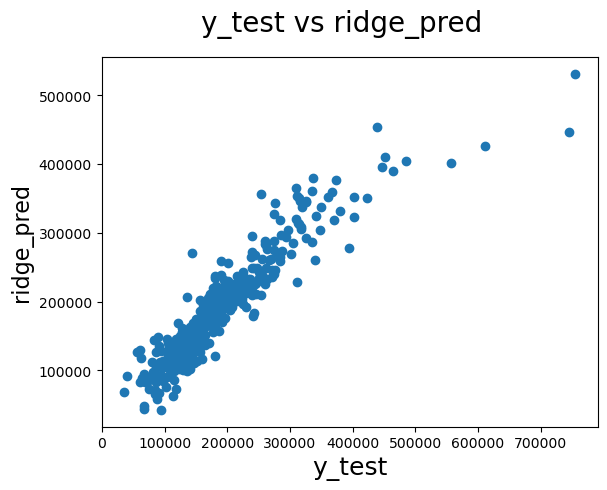

In [74]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

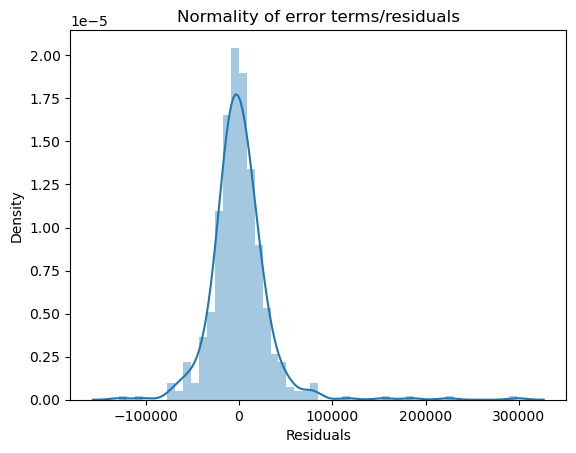

In [75]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [76]:
lasso_pred = lasso.predict(X_test1)

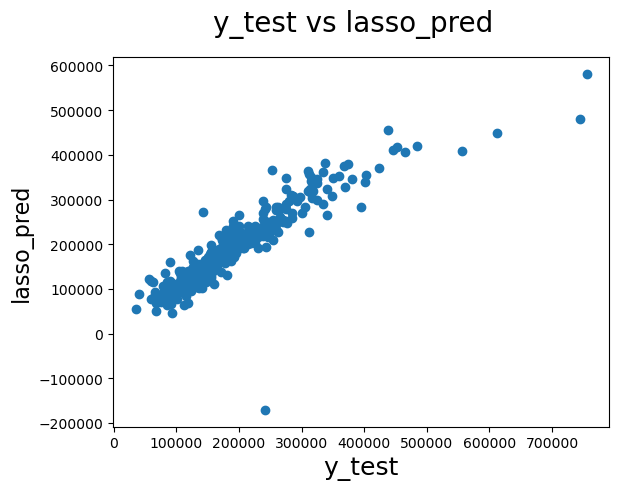

In [77]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

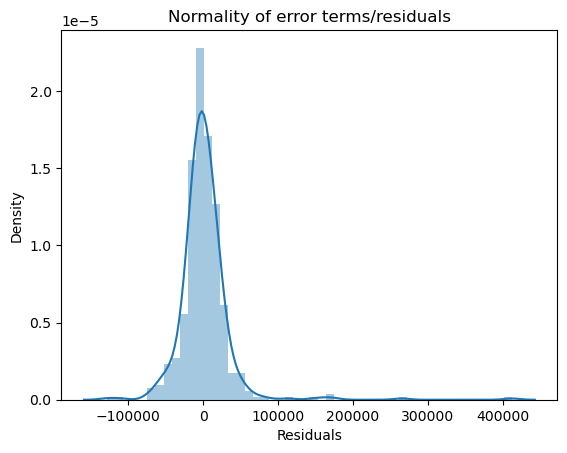

In [78]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

# Lets observe the changes in the coefficients after regularization

In [79]:
betas = pd.DataFrame(index=X_train1.columns)

In [80]:
betas.rows = X_train1.columns

In [81]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [82]:
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge          Lasso
MSSubClass            -10401.982391   -3940.818139
LotArea                47544.259605   92839.826484
OverallQual            98667.484212   93869.555868
OverallCond            39569.518210   43880.661641
YearBuilt              36111.425818   47579.696685
MasVnrArea             32319.905679   30317.204051
BsmtFinSF1             13218.370908   56052.913631
BsmtFinSF2              3656.918815    3267.754852
BsmtUnfSF               -474.035725      -0.000000
TotalBsmtSF            12703.516442   34738.301367
1stFlrSF               61888.509393       0.000000
2ndFlrSF               46969.426061    9618.156081
LowQualFinSF           14230.721645      -0.000000
GrLivArea              68432.651337  224447.464429
BsmtFullBath           31353.610607   20567.121518
BedroomAbvGr          -13859.561016  -29098.149614
KitchenAbvGr          -32738.249366  -33717.911886
TotRmsAbvGrd           62347.110842   43698.093012
GarageArea             43155.930988   42068.761437
ScreenPorch            29471.549809   25242.020025
MSZoning_FV            12794.669780   10989.108463
MSZoning_RH             2958.588095       0.000000
MSZoning_RL            12818.033978   10115.443996
MSZoning_RM              -90.081751      -0.000000
Street_Pave            23401.678027   31684.652530
LandContour_HLS        18528.962495   16484.778147
Utilities_NoSeWa      -23432.170917  -15704.749515
LotConfig_FR3          -3077.667727      -0.000000
LandSlope_Sev          15465.504379   -3172.497294
Neighborhood_CollgCr  -13612.675988  -10460.793609
Neighborhood_Edwards  -30210.565543  -22441.241739
Neighborhood_Gilbert  -15983.805464  -12515.011308
Neighborhood_IDOTRR   -16414.863741  -11791.144738
Neighborhood_Mitchel  -19825.983677  -18812.748527
Neighborhood_NAmes    -25059.667960  -22401.635670
Neighborhood_NWAmes   -19265.296753  -20300.041272
Neighborhood_NoRidge   27925.528031   24176.443926
Neighborhood_OldTown  -14369.184545  -12641.662692
Neighborhood_SWISU    -18130.133107  -12487.303039
Neighborhood_Sawyer   -16871.926647  -13108.976130
Neighborhood_SawyerW  -14868.577440  -12129.428424
Neighborhood_StoneBr   29064.239538   25667.967603
Neighborhood_Timber   -15358.540207  -16111.234955
Condition1_PosN        -2765.791249    1741.844380
Condition1_RRAe       -16872.652501  -17777.823191
Condition1_RRNe         1256.591575       0.000000
Condition2_PosA            0.000000       0.000000
Condition2_PosN      -106433.028469 -196188.115996
Condition2_RRNn            0.000000       0.000000
BldgType_2fmCon        -1087.203208   -5008.967535
BldgType_Duplex       -11806.701838  -11979.587162
BldgType_Twnhs        -25982.004970  -26240.046833
BldgType_TwnhsE       -18713.731777  -20276.612668
HouseStyle_1.5Unf       8461.085411    9208.099072
HouseStyle_1Story      13170.079460   10346.260537
HouseStyle_2.5Fin       2392.714538      -0.000000
RoofStyle_Mansard      27847.924622   27367.996733
RoofStyle_Shed          5152.532524       0.000000
RoofMatl_CompShg       66768.794588  393934.354418
RoofMatl_Membran           0.000000       0.000000
RoofMatl_Metal         28505.436076  381111.604110
RoofMatl_Roll          27588.779562  367700.502213
RoofMatl_Tar&Grv       56553.421671  390966.161806
RoofMatl_WdShake       40990.501982  390622.972519
RoofMatl_WdShngl       91546.617772  436231.718421
Exterior1st_BrkComm    11652.337584      23.209053
Exterior1st_CBlock    -12692.230398  -11918.591401
Exterior1st_CemntBd     -722.499951    -998.076727

The company wants to know:

   - Which variables are significant in predicting the price of a house, and

   - How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

# Q1-Which variables are significant in predicting the price of a house?

Answer- The below mentioned variables are significant in predicting the price

- LotArea------------- Lot size in square feet
- OverallQual--------Rates the overall material and finish of the house
- OverallCond-------Rates the overall condition of the house
- YearBuilt-------- ---Original construction date
- BsmtFinSF1-------Type 1 finished square feet
- TotalBsmtSF------Total square feet of basement area
- GrLivArea----------Above grade (ground) living area square feet
- TotRmsAbvGrd---Total rooms above grade (does not include bathrooms)
- Street_Pave-------Pave road access to property
- RoofMatl_Metal--Roof material_Metal


#  Q2 -How well those variables describe the price of a house

Answer-

               Ridge Regression  Lasso Regression

R2 score(Train)---------        0.88    ----------------------------0.88

R2 score(Test)-----------0.87-----------------------------0.86

In [83]:
final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.143292e-01      8.873333e-01      9.158997e-01
1   R2 Score (Test)      -3.481570e+19      8.557458e-01      8.329842e-01
2       RSS (Train)       4.856947e+11      6.387429e+11      4.767911e+11
3        RSS (Test)       1.231971e+32      5.104508e+11      5.909939e+11
4       MSE (Train)       2.228498e+04      2.555604e+04      2.207977e+04
5        MSE (Test)       5.055647e+14      3.254269e+04      3.501612e+04

In [84]:
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge          Lasso
MSSubClass            -10401.982391   -3940.818139
LotArea                47544.259605   92839.826484
OverallQual            98667.484212   93869.555868
OverallCond            39569.518210   43880.661641
YearBuilt              36111.425818   47579.696685
MasVnrArea             32319.905679   30317.204051
BsmtFinSF1             13218.370908   56052.913631
BsmtFinSF2              3656.918815    3267.754852
BsmtUnfSF               -474.035725      -0.000000
TotalBsmtSF            12703.516442   34738.301367
1stFlrSF               61888.509393       0.000000
2ndFlrSF               46969.426061    9618.156081
LowQualFinSF           14230.721645      -0.000000
GrLivArea              68432.651337  224447.464429
BsmtFullBath           31353.610607   20567.121518
BedroomAbvGr          -13859.561016  -29098.149614
KitchenAbvGr          -32738.249366  -33717.911886
TotRmsAbvGrd           62347.110842   43698.093012
GarageArea             43155.930988   42068.761437
ScreenPorch            29471.549809   25242.020025
MSZoning_FV            12794.669780   10989.108463
MSZoning_RH             2958.588095       0.000000
MSZoning_RL            12818.033978   10115.443996
MSZoning_RM              -90.081751      -0.000000
Street_Pave            23401.678027   31684.652530
LandContour_HLS        18528.962495   16484.778147
Utilities_NoSeWa      -23432.170917  -15704.749515
LotConfig_FR3          -3077.667727      -0.000000
LandSlope_Sev          15465.504379   -3172.497294
Neighborhood_CollgCr  -13612.675988  -10460.793609
Neighborhood_Edwards  -30210.565543  -22441.241739
Neighborhood_Gilbert  -15983.805464  -12515.011308
Neighborhood_IDOTRR   -16414.863741  -11791.144738
Neighborhood_Mitchel  -19825.983677  -18812.748527
Neighborhood_NAmes    -25059.667960  -22401.635670
Neighborhood_NWAmes   -19265.296753  -20300.041272
Neighborhood_NoRidge   27925.528031   24176.443926
Neighborhood_OldTown  -14369.184545  -12641.662692
Neighborhood_SWISU    -18130.133107  -12487.303039
Neighborhood_Sawyer   -16871.926647  -13108.976130
Neighborhood_SawyerW  -14868.577440  -12129.428424
Neighborhood_StoneBr   29064.239538   25667.967603
Neighborhood_Timber   -15358.540207  -16111.234955
Condition1_PosN        -2765.791249    1741.844380
Condition1_RRAe       -16872.652501  -17777.823191
Condition1_RRNe         1256.591575       0.000000
Condition2_PosA            0.000000       0.000000
Condition2_PosN      -106433.028469 -196188.115996
Condition2_RRNn            0.000000       0.000000
BldgType_2fmCon        -1087.203208   -5008.967535
BldgType_Duplex       -11806.701838  -11979.587162
BldgType_Twnhs        -25982.004970  -26240.046833
BldgType_TwnhsE       -18713.731777  -20276.612668
HouseStyle_1.5Unf       8461.085411    9208.099072
HouseStyle_1Story      13170.079460   10346.260537
HouseStyle_2.5Fin       2392.714538      -0.000000
RoofStyle_Mansard      27847.924622   27367.996733
RoofStyle_Shed          5152.532524       0.000000
RoofMatl_CompShg       66768.794588  393934.354418
RoofMatl_Membran           0.000000       0.000000
RoofMatl_Metal         28505.436076  381111.604110
RoofMatl_Roll          27588.779562  367700.502213
RoofMatl_Tar&Grv       56553.421671  390966.161806
RoofMatl_WdShake       40990.501982  390622.972519
RoofMatl_WdShngl       91546.617772  436231.718421
Exterior1st_BrkComm    11652.337584      23.209053
Exterior1st_CBlock    -12692.230398  -11918.591401
Exterior1st_CemntBd     -722.499951    -998.076727

# Problem Statement -Part 2

Question 1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

 1. The optimal value of alpha for ridge and lasso regression

    Ridge Alpha 1

    lasso Alpha 10

Ridge Regression

In [86]:
#Change the alpha value from 1 to 2
alpha = 2
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train1, y_train)

Ridge(alpha=2)

In [87]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train1)
y_pred_test = ridge2.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

#Alpha 1
#R2score(train) 0.884340040460635
#R2score(test)  0.869613280468847

0.8803790016338743
0.8526541658513178
678168982463.4943
521390695110.1405
693424317.4473356
1081723433.8384657


2. R2score on training data has decreased but it has increased on testing data

# Lasso 

In [88]:
#Changed alpha 20 to 40
alpha =40
lasso20 = Lasso(alpha=alpha)
lasso20.fit(X_train1, y_train)

Lasso(alpha=40)

In [91]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso20.predict(X_train1)
y_pred_test = lasso20.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

#R2score at alpha-10
#0.8859222400899005
#0.8646666084570094

0.8995605140457561
0.8605027263808787
569422968534.8856
493618166258.10364
582232074.1665497
1024104079.373659


R2score of training data has decrease and it has increase on testing data

In [95]:
#important predictor variables
betas = pd.DataFrame(index=X_train1.columns)
betas.rows = X_train1.columns
betas['Ridge2'] = ridge2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso20'] = lasso20.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge2          Ridge          Lasso        Lasso20
MSSubClass           -14150.614087  -10401.982391   -3940.818139  -12975.513688
LotArea               36843.071078   47544.259605   92839.826484   75300.910120
OverallQual           94634.432994   98667.484212   93869.555868  106252.463658
OverallCond           37340.967126   39569.518210   43880.661641   39446.108791
YearBuilt             32810.628461   36111.425818   47579.696685   38878.963625
MasVnrArea            31192.963282   32319.905679   30317.204051   30016.618091
BsmtFinSF1            14434.260731   13218.370908   56052.913631   24476.103484
BsmtFinSF2             4112.279095    3656.918815    3267.754852      50.887202
BsmtUnfSF               820.688395    -474.035725      -0.000000    -896.416294
TotalBsmtSF           14405.668445   12703.516442   34738.301367       0.000000
1stFlrSF              53651.906780   61888.509393       0.000000       0.000000
2ndFlrSF              45439.471757   46969.426061    9618.156081    8399.704821
LowQualFinSF          10963.241822   14230.721645      -0.000000      -0.000000
GrLivArea             60794.073799   68432.651337  224447.464429  202554.236810
BsmtFullBath          31378.214023   31353.610607   20567.121518   28483.180882
BedroomAbvGr          -6257.021790  -13859.561016  -29098.149614  -17816.369964
KitchenAbvGr         -26579.980160  -32738.249366  -33717.911886  -28902.838497
TotRmsAbvGrd          61191.545002   62347.110842   43698.093012   48131.408007
GarageArea            43794.337193   43155.930988   42068.761437   41594.921885
ScreenPorch           28774.433930   29471.549809   25242.020025   26672.950766
MSZoning_FV           10409.374166   12794.669780   10989.108463    9820.235622
MSZoning_RH             451.340291    2958.588095       0.000000       0.000000
MSZoning_RL           11093.015770   12818.033978   10115.443996   10240.346239
MSZoning_RM           -2880.408753     -90.081751      -0.000000   -1495.092889
Street_Pave           16185.430460   23401.678027   31684.652530   19446.554752
LandContour_HLS       18675.984615   18528.962495   16484.778147   16732.775365
Utilities_NoSeWa     -15797.247217  -23432.170917  -15704.749515    -196.485539
LotConfig_FR3         -1490.956853   -3077.667727      -0.000000      -0.000000
LandSlope_Sev         15215.674005   15465.504379   -3172.497294    1236.248866
Neighborhood_CollgCr -13516.129577  -13612.675988  -10460.793609  -10874.219037
Neighborhood_Edwards -30147.743928  -30210.565543  -22441.241739  -24294.022749
Neighborhood_Gilbert -15190.942713  -15983.805464  -12515.011308  -13304.892000
Neighborhood_IDOTRR  -15560.206090  -16414.863741  -11791.144738  -12178.767493
Neighborhood_Mitchel -18397.659829  -19825.983677  -18812.748527  -17388.458067
Neighborhood_NAmes   -24349.968821  -25059.667960  -22401.635670  -22002.570836
Neighborhood_NWAmes  -16891.523327  -19265.296753  -20300.041272  -18373.626618
Neighborhood_NoRidge  28786.136779   27925.528031   24176.443926   26521.260098
Neighborhood_OldTown -13895.984621  -14369.184545  -12641.662692  -12928.907823
Neighborhood_SWISU   -18199.348887  -18130.133107  -12487.303039  -13284.432652
Neighborhood_Sawyer  -16362.054090  -16871.926647  -13108.976130  -13032.412640
Neighborhood_SawyerW -14052.068820  -14868.577440  -12129.428424  -12220.386829
Neighborhood_StoneBr  28894.300934   29064.239538   25667.967603   26618.550154
Neighborhood_Timber  -14210.195832  -15358.540207  -16111.234955  -15603.111888
Condition1_PosN       -5315.584577   -2765.791249    1741.844380       0.000000
Condition1_RRAe      -15639.233834  -16872.652501  -17777.823191  -14910.131791
Condition1_RRNe         352.398841    1256.591575       0.000000       0.000000
Condition2_PosA           0.000000       0.000000       0.000000       0.000000
Condition2_PosN      -73993.113052 -106433.028469 -196188.115996 -163765.000669
Condition2_RRNn           0.000000       0.000000       0.000000       0.000000
BldgType_2fmCon        -312.

- LotArea---------------Lot size in square feet
- OverallQual---------Rates the overall material and finish of the house
- OverallCond--------Rates the overall condition of the house
- YearBuilt-------------Original construction date
- BsmtFinSF1--------Type 1 finished square feet
- TotalBsmtSF------- Total square feet of basement area
- GrLivArea-----------Above grade (ground) living area square feet
- TotRmsAbvGrd----Total rooms above grade (does not include bathrooms)
- Street_Pave--------Pave road access to property
- RoofMatl_Metal----Roof material_Metal



Predictors are same but the coefficent of these predictor has changed

# Question 2
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

 Answer:
        
The r2_score of lasso is slightly higher than lasso for the test dataset so we will choose lasso regression to solve this problem

# Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [96]:
X_train1

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  GarageArea  ScreenPorch  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LandContour_HLS  Utilities_NoSeWa  LotConfig_FR3  LandSlope_Sev  Neighborhood_CollgCr  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_StoneBr  Neighborhood_Timber  Condition1_PosN  Condition1_RRAe  Condition1_RRNe  Condition2_PosA  Condition2_PosN  Condition2_RRNn  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  HouseStyle_1Story  HouseStyle_2.5Fin  RoofStyle_Mansard  RoofStyle_Shed  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  \
615     0.382353  0.035056     0.555556        0.750   0.659420    0.113208    0.135188    0.000000   0.074058     0.153191  0.165213  0.000000      0.000000   0.135644      0.333333         0.375           0.5      0.333333    0.338505     0.000000        False        False         True        False         True            False             False          False          False                 False                 False                 False                False                 False                True                False                 False                 False               False                False                 False                 False                False            False            False            False            False            False            False            False            False           False            False              False              False              False              False           False              True             False           False   
613     0.000000  0.033195     0.444444        0.500   0.978261    0.000000    0.036499    0.000000   0.391267     0.183306  0.180358  0.000000      0.000000   0.148078      0.000000         0.375           0.5      0.333333    0.000000     0.000000        False        False         True        False         True            False             False          False          False                 False                 False                 False                False                  True               False                False                 False                 False               False                False                 False                 False                False            False            False            False            False            False            False            False            False           False            False              False               True              False              False           False              True             False           False   
1303    0.000000  0.034532     0.666667        0.500   0.963768    0.165457    0.000000    0.000000   0.691781     0.264484  0.294172  0.000000      0.000000   0.241522      0.000000         0.375           0.5      0.416667    0.588152     0.000000        False        False         True        False         True            False             False          False          False                 False                 False                 False                False                 False               False                False                 False                 False               False                False                 False                 False                False            False            False            False            False            False            False            False            False           False            False              False               True              False              False           False              True             False           False   
486     0.000000  0.04

In [97]:
y_train

615     137500
613     147000
1303    232000
486     156000
561     170000
308      82500
461     155000
1142    424870
730     236500
1155    218000
1203    213000
700     312500
849     187000
1260    181000
787     233000
352      95000
710      52000
124     181000
178     501837
287      88000
1407    112000
1208    140000
294     167000
327     145250
1456    210000
841     157500
1121    212900
931     117500
236     185500
88       85000
886     145000
552     255500
630     124000
1352    134900
665     230500
900     110000
290     233230
1382    157000
570     142600
348     154000
544     179665
1376     91000
660     197900
1111    205000
458     161000
1005    149900
333     207000
721     143000
1289    281000
678     372500
1354    235000
328     214500
318     260000
1438    149700
908     131000
12      144000
171     215000
260     176000
778     144000
818     155000
759     290000
138     230000
1209    290000
885     328900
741     142000
139     231500
1276    16

In [98]:
X_train1.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 'SaleType_Con', 'SaleType_Oth', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Partial'], dtype='object', length=114)

LotArea,OverallQual,YearBuilt,BsmtFinSF1,TotalBsmtSF are the top 5 important predictors.

Let's drop these columns

In [99]:
X_train2 = X_train1.drop(['LotArea','OverallQual','YearBuilt','BsmtFinSF1','TotalBsmtSF'],axis=1)
X_test2 = X_test1.drop(['LotArea','OverallQual','YearBuilt','BsmtFinSF1','TotalBsmtSF'],axis=1)

In [100]:
X_train2.head()

MSSubClass  OverallCond  MasVnrArea  BsmtFinSF2  BsmtUnfSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  GarageArea  ScreenPorch  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LandContour_HLS  Utilities_NoSeWa  LotConfig_FR3  LandSlope_Sev  Neighborhood_CollgCr  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_StoneBr  Neighborhood_Timber  Condition1_PosN  Condition1_RRAe  Condition1_RRNe  Condition2_PosA  Condition2_PosN  Condition2_RRNn  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  HouseStyle_1Story  HouseStyle_2.5Fin  RoofStyle_Mansard  RoofStyle_Shed  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  RoofMatl_Roll  RoofMatl_Tar&Grv  RoofMatl_WdShake  \
615     0.382353         0.75    0.113208    0.000000   0.074058  0.165213       0.0           0.0   0.135644      0.333333         0.375           0.5      0.333333    0.338505          0.0        False        False         True        False         True            False             False          False          False                 False                 False                 False                False                 False                True                False                 False                 False               False                False                 False                 False                False            False            False            False            False            False            False            False            False           False            False              False              False              False              False           False              True             False           False          False             False             False   
613     0.000000         0.50    0.000000    0.000000   0.391267  0.180358       0.0           0.0   0.148078      0.000000         0.375           0.5      0.333333    0.000000          0.0        False        False         True        False         True            False             False          False          False                 False                 False                 False                False                  True               False                False                 False                 False               False                False                 False                 False                False            False            False            False            False            False            False            False            False           False            False              False               True              False              False           False              True             False           False          False             False             False   
1303    0.000000         0.50    0.165457    0.000000   0.691781  0.294172       0.0           0.0   0.241522      0.000000         0.375           0.5      0.416667    0.588152          0.0        False        False         True        False         True            False             False          False          False                 False                 False                 False                False                 False               False                False                 False                 False               False                False                 False                 False                False            False            False            False            False            False            False            False            False           False            False              False               True              False              False           False              True             False           False          False             False             False   
486     0.000000         0.75    0.121916    0.000000 

In [101]:
X_test2.head()

MSSubClass  OverallCond  MasVnrArea  BsmtFinSF2  BsmtUnfSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  GarageArea  ScreenPorch  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LandContour_HLS  Utilities_NoSeWa  LotConfig_FR3  LandSlope_Sev  Neighborhood_CollgCr  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_StoneBr  Neighborhood_Timber  Condition1_PosN  Condition1_RRAe  Condition1_RRNe  Condition2_PosA  Condition2_PosN  Condition2_RRNn  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  HouseStyle_1Story  HouseStyle_2.5Fin  RoofStyle_Mansard  RoofStyle_Shed  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  RoofMatl_Roll  RoofMatl_Tar&Grv  RoofMatl_WdShake  \
892     0.000000        0.875    0.000000         0.0   0.169521  0.168426  0.000000           0.0   0.138282      0.000000         0.375           0.5      0.333333    0.186178          0.0        False        False         True        False         True            False             False          False          False                 False                 False                 False                False                 False               False                False                 False                 False               False                 True                 False                 False                False            False            False            False            False            False            False            False            False           False            False              False               True              False              False           False              True             False           False          False             False             False   
1105    0.235294        0.500    0.262700         0.0   0.184503  0.267554  0.617162           0.0   0.431047      0.333333         0.375           0.5      0.583333    0.502116          0.0        False        False         True        False         True            False             False          False          False                 False                 False                 False                False                 False               False                False                  True                 False               False                False                 False                 False                False            False            False            False            False            False            False            False            False           False            False              False              False              False              False           False              True             False           False          False             False             False   
413     0.058824        0.625    0.000000         0.0   0.431507  0.159247  0.000000           0.0   0.130746      0.000000         0.250           0.5      0.250000    0.253879          0.0        False        False        False         True         True            False             False          False          False                 False                 False                 False                False                 False               False                False                 False                  True               False                False                 False                 False                False            False            False            False            False            False            False            False            False           False            False              False               True              False              False           False              True             False           False          False             False             False   
522     0.176471        0.750    0.000000         0.0 

# Lasso

In [102]:
# alpha 10 
alpha =10
lasso21 = Lasso(alpha=alpha)
lasso21.fit(X_train2, y_train)

Lasso(alpha=10)

In [103]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso21.predict(X_train2)
y_pred_test = lasso21.predict(X_test2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)
#R2score at alpha-10
#0.8859222400899005
#0.8646666084570094

0.9013482938532116
0.8090097798428133
559287483716.5764
675828564969.8839
571868592.7572356
1402133952.2196763


R2score of training and testing data has decreased

In [104]:
#important predictor variables
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train1.columns
betas['Lasso21'] = lasso21.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

Lasso21
MSSubClass             -5913.670484
OverallCond            45864.136924
MasVnrArea             52294.723334
BsmtFinSF2                -0.000000
BsmtUnfSF              -3365.878085
1stFlrSF               88558.004543
2ndFlrSF               19795.444989
LowQualFinSF              -0.000000
GrLivArea             230553.002079
BsmtFullBath           34120.635633
BedroomAbvGr          -29088.959098
KitchenAbvGr          -65183.068065
TotRmsAbvGrd           49084.521730
GarageArea             54423.474694
ScreenPorch            22293.584975
MSZoning_FV            30700.674755
MSZoning_RH             8949.210541
MSZoning_RL            21371.278921
MSZoning_RM             6491.656500
Street_Pave            32773.382883
LandContour_HLS        17218.341920
Utilities_NoSeWa      -43171.709140
LotConfig_FR3           1924.514602
LandSlope_Sev          21500.276974
Neighborhood_CollgCr   -5263.642832
Neighborhood_Edwards  -27173.804747
Neighborhood_Gilbert   -4003.670303
Neighborhood_IDOTRR   -15740.445678
Neighborhood_Mitchel  -14637.770063
Neighborhood_NAmes    -22353.676868
Neighborhood_NWAmes   -16474.128735
Neighborhood_NoRidge   26370.051805
Neighborhood_OldTown  -18419.597364
Neighborhood_SWISU    -19055.825304
Neighborhood_Sawyer   -13843.630809
Neighborhood_SawyerW   -8473.476469
Neighborhood_StoneBr   31591.226176
Neighborhood_Timber    -7924.746129
Condition1_PosN        -3873.596714
Condition1_RRAe       -15546.894966
Condition1_RRNe           -0.000000
Condition2_PosA            0.000000
Condition2_PosN      -191519.154190
Condition2_RRNn            0.000000
BldgType_2fmCon         -448.085775
BldgType_Duplex        -8852.422752
BldgType_Twnhs        -17010.469920
BldgType_TwnhsE       -13224.336931
HouseStyle_1.5Unf      16453.553934
HouseStyle_1Story      10440.471193
HouseStyle_2.5Fin     -21718.757194
RoofStyle_Mansard      25550.659527
RoofStyle_Shed            -0.000000
RoofMatl_CompShg      430495.950465
RoofMatl_Membran           0.000000
RoofMatl_Metal        422534.963489
RoofMatl_Roll         417619.825894
RoofMatl_Tar&Grv      424471.275762
RoofMatl_WdShake      422024.711025
RoofMatl_WdShngl      489948.872918
Exterior1st_BrkComm    10252.748946
Exterior1st_CBlock    -40417.414868
Exterior1st_CemntBd       -0.000000
Exterior1st_HdBoard   -12654.614943
Exterior1st_ImStucc        0.000000
Exterior1st_MetalSd   -11832.784851
Exterior1st_Plywood   -15115.022831
Exterior1st_Stucco    -13531.697487

five most important predictor variables

- 11stFlrSF-----------First Floor square feet
- GrLivArea-----------Above grade (ground) living area square feet
- Street_Pave---------Pave road access to property
- RoofMatl_Metal------Roof material_Metal
- RoofStyle_Shed------Type of roof(Shed)

# Question 4
How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

Answer

The model should be generalized so that the test accuracy is not lesser than the training score. The model should be accurate for datasets other than the ones which were used during training. Too much importance should not given to the outliers so that the accuracy predicted by the model is high. To ensure that this is not the case, the outliers analysis needs to be done and only those which are relevant to the dataset need to be retained. Those outliers which  it does not make sense to keep must be removed from the dataset. If the model is not robust, It cannot be trusted for predictive analysis.